In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def load_state(file_name):
    """Utility function to load PSO Object

    :param file_name: .pkl file where PSO Object is saved
    :type file_name: str
    :return: pso object
    :rtype: PSO
    """
    import dill
    return dill.load(open(file_name, "rb"))

# LodkaVolterra paramters and initial conditions.
alpha, beta, gamma, delta = 1., 1., 1., 1.
x0, y0 = 4., 2.
tmax = 10

def lodkavolterra(t, X, alpha, beta, gamma, delta):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return dotx, doty


def solve_lodkavolterra(lodkavolterra, tmax, x0, y0, alpha, beta, gamma, delta, n=1000):
    soln = solve_ivp(lodkavolterra, (0, tmax), (x0, y0),
                     args=(alpha, beta, gamma, delta),
                     dense_output=True)
    t = np.linspace(0, tmax, n)
    x, y = soln.sol(t)
    return (x, y, t)


def create_data(tmax, x0, y0, alpha, beta, gamma, delta):
    (x, y, t) = solve_lodkavolterra(
        lodkavolterra, tmax, x0, y0, alpha, beta, gamma, delta)
    return (x, y, t)


# creating data
x,y,t = create_data(tmax, x0, y0, alpha, beta, gamma, delta)

# getting pso
pso = load_state("pso.pkl")

In [3]:
alpha, beta, gamma, delta = pso.global_best_position
x_hat,y_hat,t = create_data(tmax, x0, y0, alpha, beta, gamma, delta)

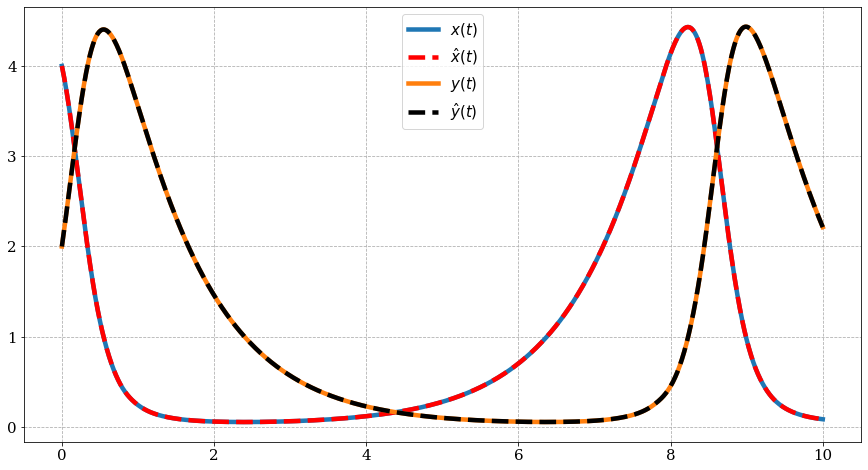

In [17]:
fig, axes = plt.subplots(figsize=(15, 8))
for label in axes.get_xticklabels():
        label.set_fontproperties('serif')
    
for label in axes.get_yticklabels():
    label.set_fontproperties('serif')  
    
axes.tick_params(axis='both', which='major', labelsize=15)
axes.grid(which='major', linestyle='--')
plt.plot(t, x, linewidth=4.5, label='$x(t)$')
plt.plot(t, x_hat, '--', linewidth=4.5, color='r', label='$\hat{x}(t)$')
plt.plot(t, y, linewidth=4.5, label='$y(t)$')
plt.plot(t, y_hat, '--', linewidth=4.5, color='k', label='$\hat{y}(t)$')
plt.legend(fontsize=15)
plt.savefig("plot1.pdf")

In [117]:
error_per_parameter = 1. - pso.global_best_position